In [1]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Collect csv in pd.DataFrame

In [2]:
data = pd.read_csv('../log/messageLog.csv', comment='#')

Count different news and froup in a list called `listNews`

In [3]:
listNews = data.groupby('news').nunique().index.tolist()

Determine max time of iteration

In [4]:
maxTimeIteration = data.max()['time']
maxTimeIteration

5

Cut useless info from database

In [31]:
cuttedData = data[['news', 'ag1', 'ag2', 'time']]

Regroup data for name of the news listed before

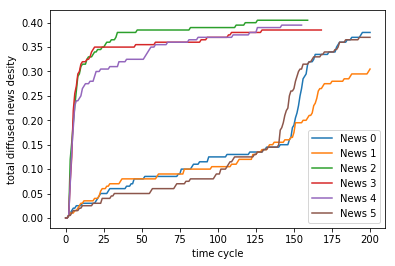

In [32]:
for ii, news in enumerate(listNews):
    cuttedSingleData = cuttedData.loc[cuttedData['news'] ==  news]
    temp = {}
    arr = np.zeros([1])
    time = 0
    for index, row in cuttedSingleData.iterrows():
        if row['ag1'] in range(0, 4, 1):
            pass
        else:
            temp[row['ag1']] = 1
        if row['ag2'] in range(0, 4, 1):
            pass
        else:
            temp[row['ag2']] = 1
        if time < row['time']:
            arr = np.append(arr, len(temp)/200)
            time = time + 1
    xlabel('time cycle')
    ylabel('total diffused news desity')
    figsize(9,7)
    plot(arr, label='News %s' %ii)
    legend(loc='lower right')

Count number of diffusion with no duplicates

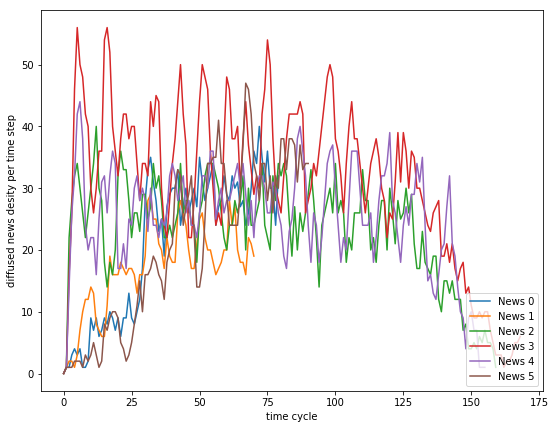

In [33]:
for ii, news in enumerate(listNews):
    cuttedSingleData = cuttedData.loc[cuttedData['news'] ==  news]
    c = cuttedSingleData['time'].value_counts().sort_index().tolist()
    arr = np.zeros([1])
    for i in range(len(c)):
        arr = np.append(arr, c[i])
    xlabel('time cycle')
    ylabel('diffused news desity per time step')
    figsize(9,7)
    plot(arr, label='News %s' %ii)
    legend(loc='lower right')